# Exploratory Data Analysis

#

In [ ]:
import pandas as pd

# Load the dataset
file_path = "D:\Data Analysis & Science\HealthCare\insurance.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max     

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\omend\AppData\Local\Temp\ipykernel_12828\3060404031.py:4: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Data Analysis & Science\HealthCare\insurance.csv"


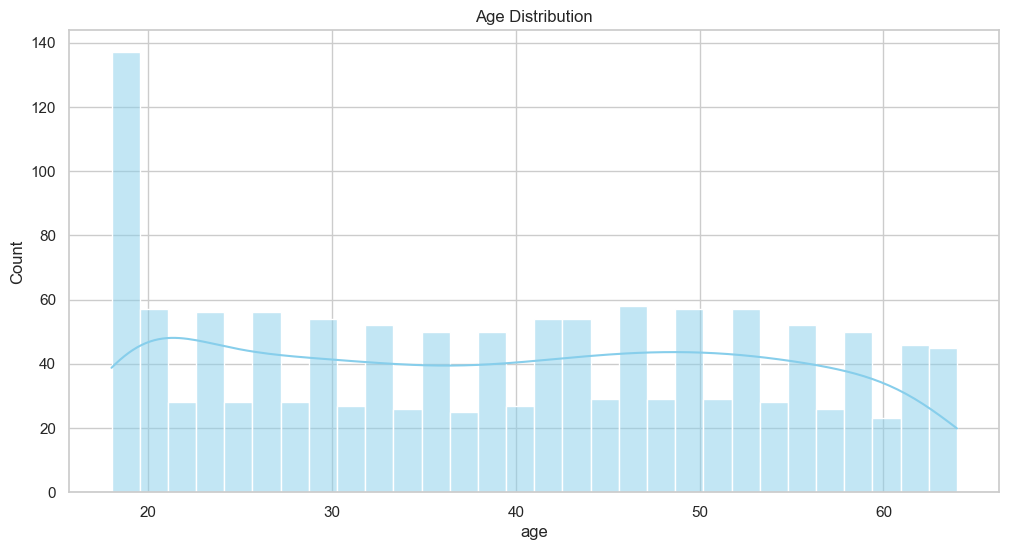

C:\Users\omend\AppData\Local\Temp\ipykernel_12828\3840073692.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette='coolwarm')


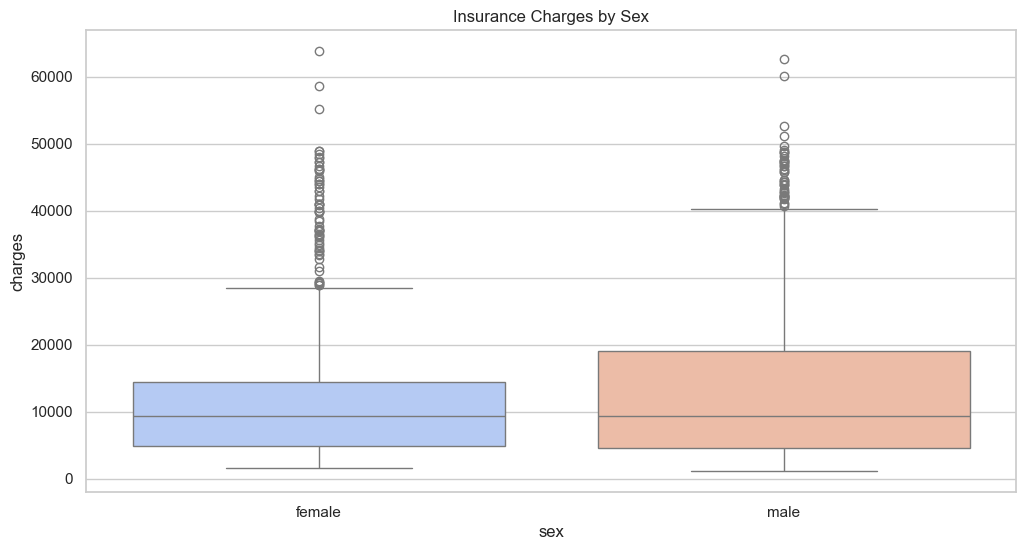

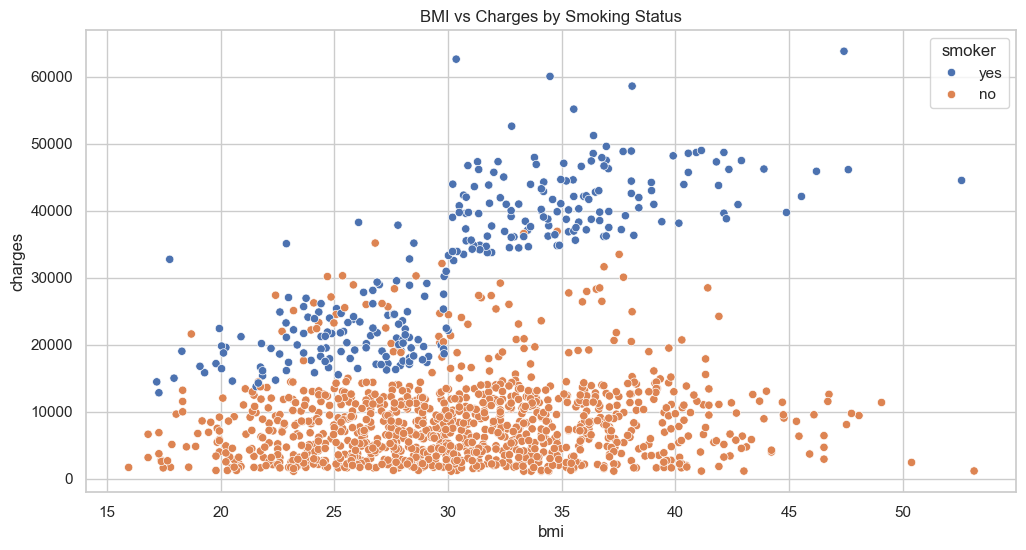

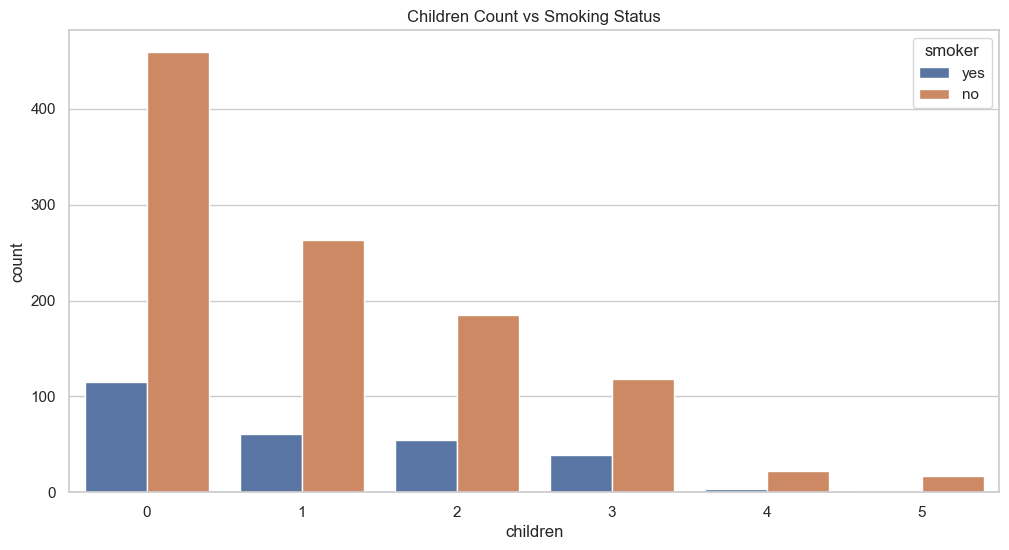

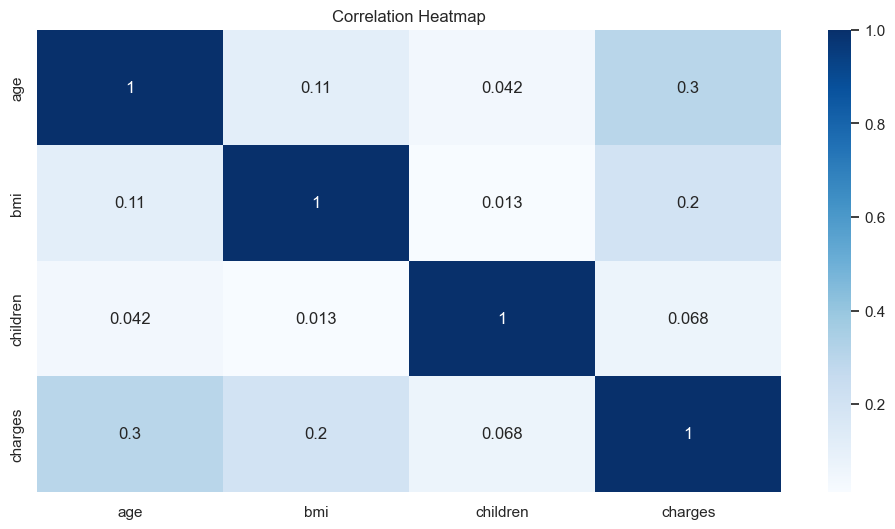

{'shape': (1338, 7),
 'columns': ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
 'data_types': age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object,
 'null_values': age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 'summary':                 age   sex          bmi     children smoker     region  \
 count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
 unique          NaN     2          NaN          NaN      2          4   
 top             NaN  male          NaN          NaN     no  southeast   
 freq            NaN   676          NaN          NaN   1064        364   
 mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
 std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
 min       18.000000   NaN    15.960000     0.000000    NaN 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Generate the full EDA code
def run_full_eda(df):
    eda_report = {}

    # Basic Statistics
    eda_report['shape'] = df.shape
    eda_report['columns'] = df.columns.tolist()
    eda_report['data_types'] = df.dtypes
    eda_report['null_values'] = df.isnull().sum()
    eda_report['summary'] = df.describe(include='all')

    # Visualizations
    plt.figure(figsize=(12, 6))
    sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
    plt.title("Age Distribution")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='sex', y='charges', data=df, palette='coolwarm')
    plt.title("Insurance Charges by Sex")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
    plt.title("BMI vs Charges by Smoking Status")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='children', hue='smoker', data=df)
    plt.title("Children Count vs Smoking Status")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
    plt.title("Correlation Heatmap")
    plt.show()

    return eda_report

# Run EDA
eda_output = run_full_eda(df)
eda_output


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ------ --------------------------------- 2.4/14.8 MB 20.1 MB/s eta 0:00:01
   ----------------- ---------------------- 6.6/14.8 MB 17.8 MB/s eta 0:00:01
   -------------------------- ------------- 10.0/14.8 MB 17.5 MB/s eta 0:00:01
   ---------------------------------- ----- 12.8/14.8 MB 16.9 MB/s eta 0:00:01
   ---------------------------------------  14.7/14.8 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 14.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install plotly

In [18]:
import plotly.express as px
import plotly.graph_objects as go

def explore_data_visually(df):
    charts = []

    # Gender breakdown (Male vs Female)
    charts.append(px.pie(df, names='sex', title='Gender Distribution'))

    # Smoking status (Yes vs No)
    charts.append(px.pie(df, names='smoker', title='Smoker vs Non-Smoker'))

    # Region-wise count of people
    charts.append(px.pie(df, names='region', title='Region Distribution'))

    # Body Mass Index distribution
    charts.append(px.histogram(df, x='bmi', nbins=40, title='BMI Distribution'))

    # Charges paid by customers
    charts.append(px.histogram(df, x='charges', nbins=40, title='Charges Distribution'))

    # Age distribution of all customers
    charts.append(px.histogram(df, x='age', nbins=40, title='Age Distribution'))

    # Number of children per customer
    charts.append(px.histogram(df, x='children', nbins=10, title='Children Count'))

    # Charges vs BMI (are higher BMI people charged more?)
    charts.append(px.scatter(df, x='bmi', y='charges', color='smoker',
                             title='Charges vs BMI'))

    # Charges vs Age (do older people pay more?)
    charts.append(px.scatter(df, x='age', y='charges', color='smoker',
                             title='Charges vs Age'))

    # Charges based on number of children
    charts.append(px.box(df, x='children', y='charges',
                         title='Charges by Number of Children'))

    # Charges across different regions
    charts.append(px.box(df, x='region', y='charges',
                         title='Charges by Region'))

    # BMI differences across gender
    charts.append(px.violin(df, x='sex', y='bmi', color='sex',
                            box=True, points='all',
                            title='BMI by Gender'))

    # Are men or women more likely to smoke?
    charts.append(px.histogram(df, x='sex', color='smoker', barmode='group',
                               title='Smoking Status by Gender'))

    # Charges comparison between smokers and non-smokers
    charts.append(px.box(df, x='smoker', y='charges', color='smoker',
                         title='Charges by Smoking Status'))

    # Correlation heatmap between numerical features
    corr = df.select_dtypes(include='number').corr()
    heatmap = go.Figure(data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='RdBu',
        colorbar=dict(title='Correlation')
    ))
    heatmap.update_layout(title='Correlation Heatmap')
    charts.append(heatmap)

    return charts

# Run this to see all visualizations
all_charts = explore_data_visually(df)

for chart in all_charts:
    chart.show()
